In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('deposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.shape

(31647, 18)

In [5]:
df.describe(include="all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


EDA

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(31647, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values

In [10]:
df.drop("ID",axis=1,inplace=True)

In [11]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [12]:
df[numerical_cols].head()

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


In [13]:
df[categorical_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no


In [14]:
df["subscribed"].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

Outliers

age            Axes(0.125,0.712609;0.227941x0.167391)
balance     Axes(0.398529,0.712609;0.227941x0.167391)
day         Axes(0.672059,0.712609;0.227941x0.167391)
duration       Axes(0.125,0.511739;0.227941x0.167391)
campaign    Axes(0.398529,0.511739;0.227941x0.167391)
pdays       Axes(0.672059,0.511739;0.227941x0.167391)
previous        Axes(0.125,0.31087;0.227941x0.167391)
dtype: object

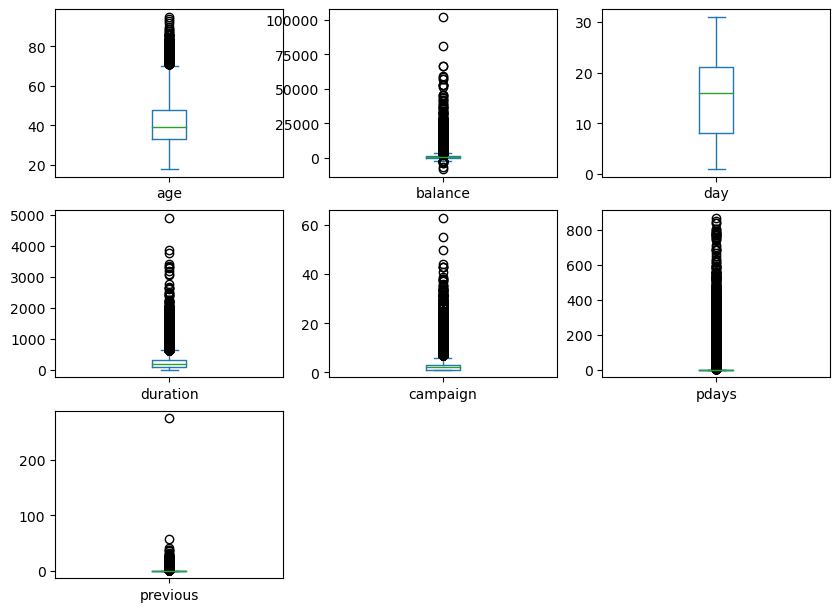

In [15]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

In [16]:

for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df.copy()
    
    new_df[i]=np.where(new_df[i] > upperl , upperl ,
                               np.where(new_df[i] <lowl, lowl ,new_df[i]
                                       )
                               )
    df[i]=new_df[i]

10.5
70.5
-1964.0
3468.0
-11.5
40.5
-217.75
640.25
-2.0
6.0
-1.0
-1.0
0.0
0.0


age            Axes(0.125,0.712609;0.227941x0.167391)
balance     Axes(0.398529,0.712609;0.227941x0.167391)
day         Axes(0.672059,0.712609;0.227941x0.167391)
duration       Axes(0.125,0.511739;0.227941x0.167391)
campaign    Axes(0.398529,0.511739;0.227941x0.167391)
pdays       Axes(0.672059,0.511739;0.227941x0.167391)
previous        Axes(0.125,0.31087;0.227941x0.167391)
dtype: object

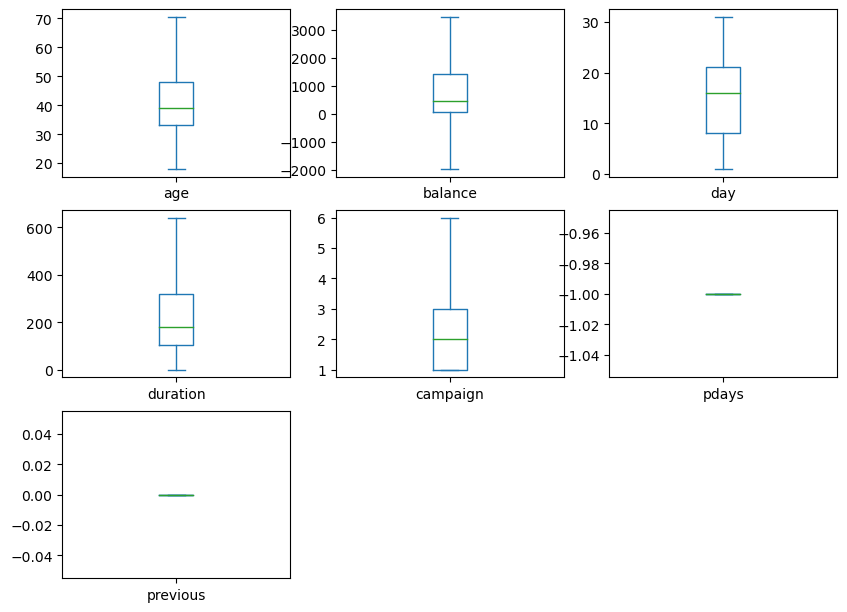

In [17]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

In [18]:
df.drop(["pdays","previous"],axis=1,inplace=True)

age            Axes(0.125,0.712609;0.227941x0.167391)
balance     Axes(0.398529,0.712609;0.227941x0.167391)
day         Axes(0.672059,0.712609;0.227941x0.167391)
duration       Axes(0.125,0.511739;0.227941x0.167391)
campaign    Axes(0.398529,0.511739;0.227941x0.167391)
dtype: object

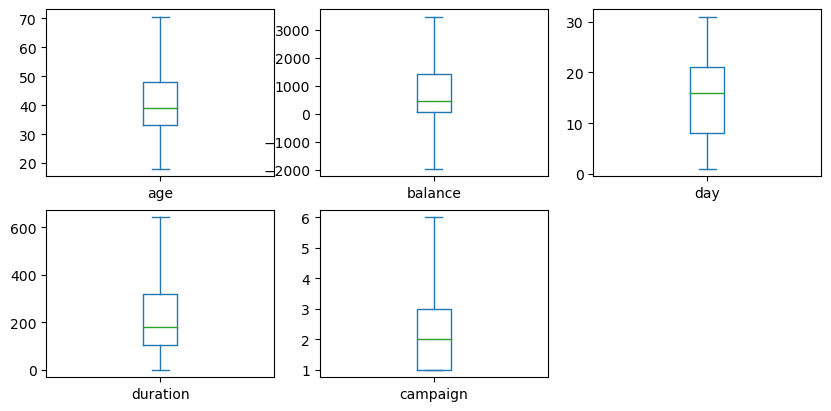

In [19]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56.0,0,1,3,0,1933.0,0,0,1,19.0,9,44.00,2.0,3,0
1,31.0,11,1,1,0,3.0,0,0,0,20.0,5,91.00,2.0,3,0
2,27.0,7,1,1,0,891.0,1,0,0,18.0,5,240.00,1.0,3,0
3,57.0,4,0,2,0,3287.0,0,0,0,22.0,6,640.25,1.0,2,1
4,31.0,9,1,1,0,119.0,1,0,0,4.0,3,380.00,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29.0,4,2,2,0,0.0,1,0,0,12.0,8,116.00,2.0,3,0
31643,53.0,4,0,2,0,380.0,0,1,0,5.0,6,438.00,2.0,3,1
31644,32.0,4,2,2,0,312.0,0,0,0,7.0,1,37.00,3.0,3,0
31645,57.0,9,1,1,0,225.0,1,0,1,15.0,8,22.00,6.0,0,0


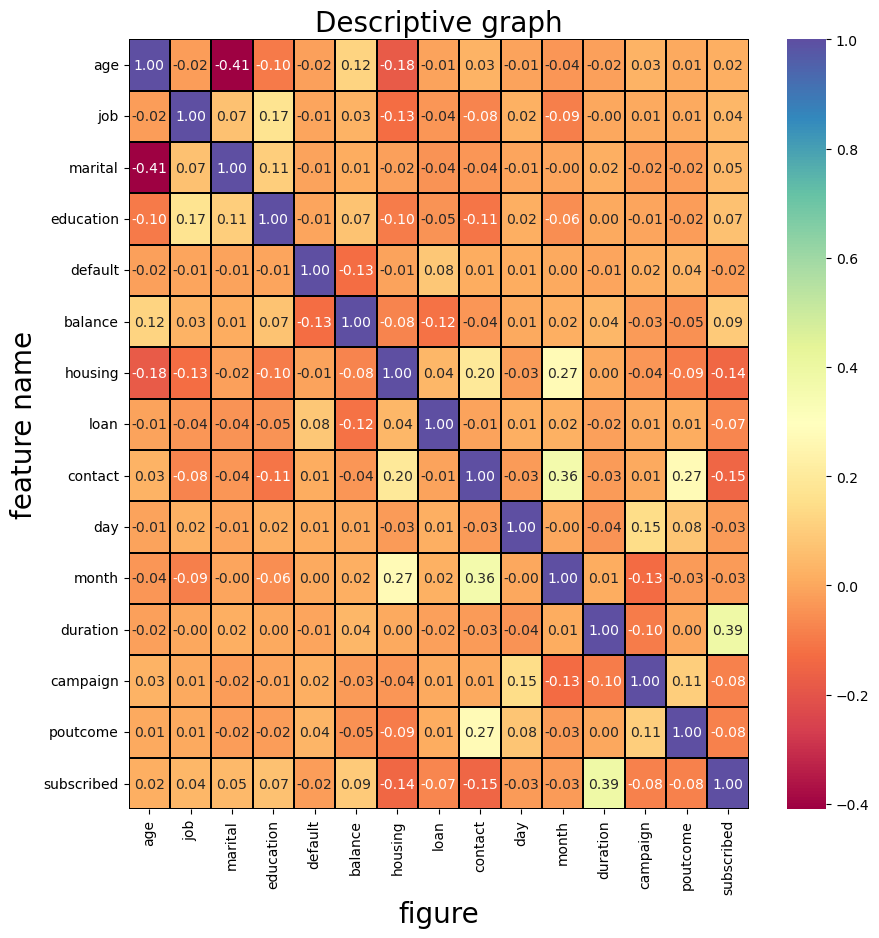

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [24]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
correlation(df,0.7)

set()

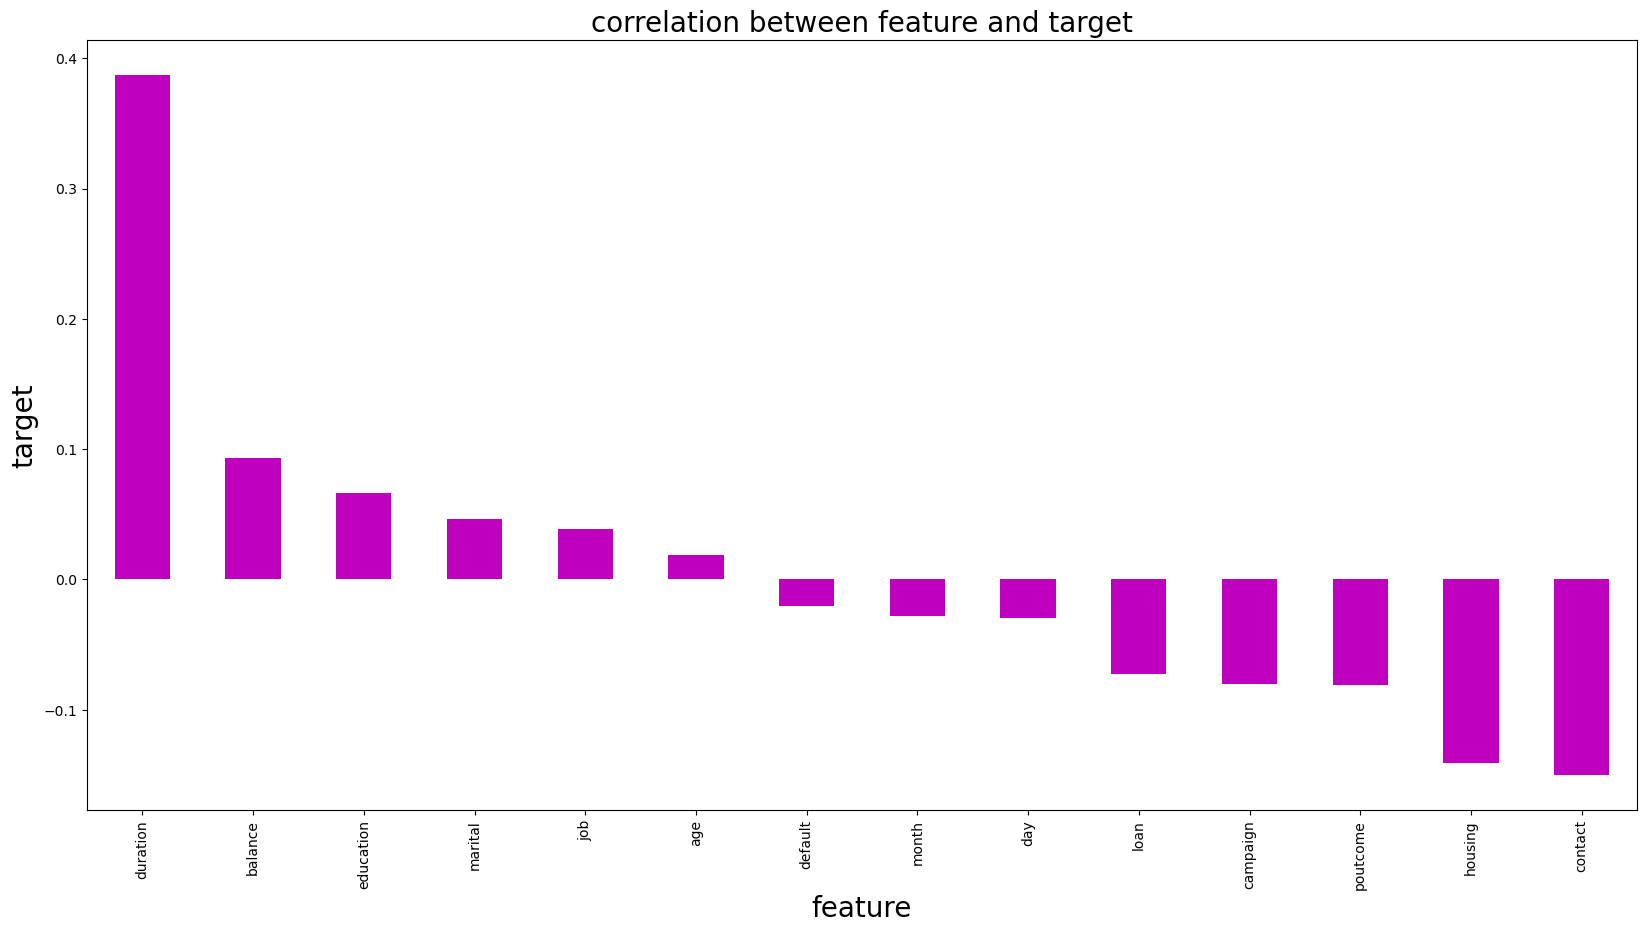

In [26]:
plt.figure(figsize=(20,10))
df.corr()['subscribed'].sort_values(ascending = False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

In [27]:
x=df.drop(['subscribed'],axis=1)
y=df['subscribed']

Check if there is any inbalance in Target

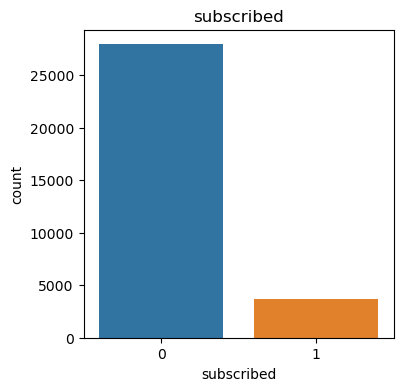

In [28]:
for i in ['subscribed']:
    plt.figure(figsize=(4,4))
    sns.countplot(x=i,data=df)
    plt.title(i)
    plt.show()

In [29]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [30]:
x,y=sm.fit_resample(x,y)

In [31]:
y.value_counts()

subscribed
0    27932
1    27932
Name: count, dtype: int64

Scaling of parameters

In [32]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 1.38858948, -1.42504469, -0.14444348, ..., -1.32400231,
        -0.1692514 ,  0.63173826],
       [-0.92879553,  2.22552774, -0.14444348, ..., -1.0954159 ,
        -0.1692514 ,  0.63173826],
       [-1.29957713,  0.89804685, -0.14444348, ..., -0.37074834,
        -0.86879233,  0.63173826],
       ...,
       [-0.81709063, -0.09756381, -0.14444348, ..., -0.03711767,
        -0.50526772, -0.36137931],
       [-0.57376985, -1.09317447, -0.14444348, ...,  1.54257973,
         2.03438906, -0.36137931],
       [-0.22790456,  0.23430641, -0.14444348, ..., -0.52505233,
        -0.32527172, -0.36137931]])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [34]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.8547902047830446
random state  8


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [36]:
print("size of x_train : ",x_train.shape)
print("size of x_test : ",x_test.shape)
print("size of y_train : ",y_train.shape)
print("size of y_test : ",y_test.shape)

size of x_train :  (41898, 14)
size of x_test :  (13966, 14)
size of y_train :  (41898,)
size of y_test :  (13966,)


Checking which model gives better results

In [37]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [38]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.8463411141343262
Confusion matrix :
 [[5762 1208]
 [ 938 6058]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      6970
           1       0.83      0.87      0.85      6996

    accuracy                           0.85     13966
   macro avg       0.85      0.85      0.85     13966
weighted avg       0.85      0.85      0.85     13966

cross validation score  0.8059038096577573
The final result of accuracy minus cross validation is  0.0404373044765689


In [39]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.9033366747816125
Confusion matrix :
 [[6238  732]
 [ 618 6378]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6970
           1       0.90      0.91      0.90      6996

    accuracy                           0.90     13966
   macro avg       0.90      0.90      0.90     13966
weighted avg       0.90      0.90      0.90     13966

cross validation score  0.9008669418108056
The final result of accuracy minus cross validation is  0.0024697329708068816


In [40]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.9389947014177288
Confusion matrix :
 [[6458  512]
 [ 340 6656]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6970
           1       0.93      0.95      0.94      6996

    accuracy                           0.94     13966
   macro avg       0.94      0.94      0.94     13966
weighted avg       0.94      0.94      0.94     13966

cross validation score  0.9280579390838145
The final result of accuracy minus cross validation is  0.010936762333914274


In [41]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.8995417442360018
Confusion matrix :
 [[6285  685]
 [ 718 6278]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6970
           1       0.90      0.90      0.90      6996

    accuracy                           0.90     13966
   macro avg       0.90      0.90      0.90     13966
weighted avg       0.90      0.90      0.90     13966

cross validation score  0.8918987111819389
The final result of accuracy minus cross validation is  0.007643033054062887


In [42]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.913074609766576
Confusion matrix :
 [[6307  663]
 [ 551 6445]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      6970
           1       0.91      0.92      0.91      6996

    accuracy                           0.91     13966
   macro avg       0.91      0.91      0.91     13966
weighted avg       0.91      0.91      0.91     13966

cross validation score  0.9028180980381808
The final result of accuracy minus cross validation is  0.010256511728395146


In [ ]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.8948875841328942
Confusion matrix :
 [[6045  925]
 [ 543 6453]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      6970
           1       0.87      0.92      0.90      6996

    accuracy                           0.89     13966
   macro avg       0.90      0.89      0.89     13966
weighted avg       0.90      0.89      0.89     13966



In [ ]:
clf=KNeighborsClassifier()
classify(clf,X,y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1,10,20],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
        
pred=svc.predict(x_test)
        
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
        
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
print("Classification report :\n",classification_report(y_test,pred))
        
cv_score=(cross_val_score(clf,x,y,cv=5).mean())
print("cross validation score ",cv_score)
        
result=acc_score-cv_score
print("The final result of accuracy minus cross validation is ",result)

In [ ]:
import pickle

In [ ]:
filename='deposit.pkl'
pickle.dump(svc,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('deposit.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

In [ ]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion